# Census Income Project

# Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()

In [3]:
data=pd.read_csv('Census Income Prediction.csv')
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.shape

(32560, 15)

0   Age             : The age of people

1   Workclass      : Type of job

2   Fnlwgt         : Final weight

3   Education      : Education status

4   Education_num  : Number of years of education in total

5   Marital_status : Marital_status 

6   Occupation     : Occupation

7   Relationship   : Relationship

8   Race           : residential segregation

9   Sex            : Gender

10  Capital_gain   : Capital gain is the profit one earns

11  Capital_loss   : Capital gain is the profit one loose

12  Hours_per_week : Earning rate as per hrs

13  Native_country : Country

14  Income         : Income (Target variable)

In [5]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no columns in dataset which have null value.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [9]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [10]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [12]:
data.drop(['Education'],axis=1)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


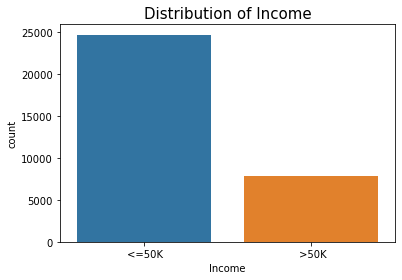

In [13]:
# Checking label counts
sns.countplot(x='Income', data=data)
plt.title("Distribution of Income", fontsize = 15)
plt.show()

In [14]:
print('-> Total No. of records : {}\n'.format(len(data)))

print('-> Number of people making more that >50K : {}%\n'.format(
    round((len(data[data['Income']==1])/32561)*100, 2)))

print('-> Number of people making less than or equal to <=50K : {}%'.format(
    round((len(data[data['Income']==0])/32561)*100, 2)))

-> Total No. of records : 32560

-> Number of people making more that >50K : 0.0%

-> Number of people making less than or equal to <=50K : 0.0%


# Age

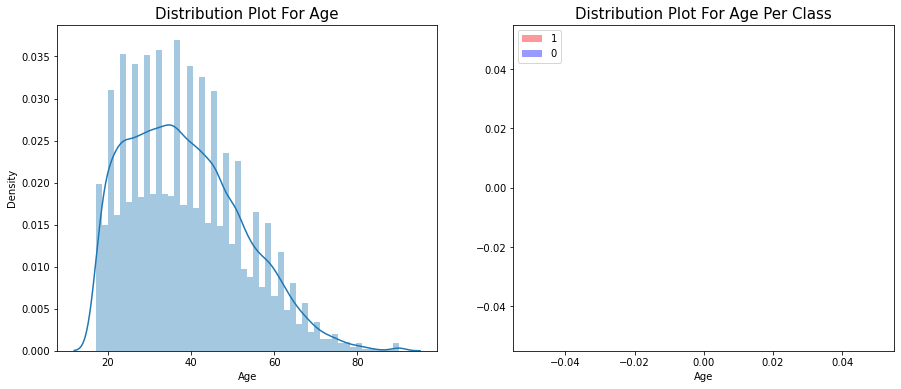

In [15]:
# Distribution plot for age column
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.distplot(data['Age'])
plt.title('Distribution Plot For Age', fontsize = 15)

# Distribution plot for age per class
plt.subplot(1,2,2)
sns.distplot(data[data['Income']==1]['Age'], label='1', color='red')
sns.distplot(data[data['Income']==0]['Age'], label='0', color='blue')
plt.legend()
plt.title('Distribution Plot For Age Per Class', fontsize = 15)
plt.show()

On taking a look at the result of distribution plot for age column, I can see that the most no of people are young.

And The distributions for age per class have some overlap on the far right-hand side.

By looking distribution plot for age per class graph we can say that there are relatively less young people who have an annual income is more than 50K.

# Workclass

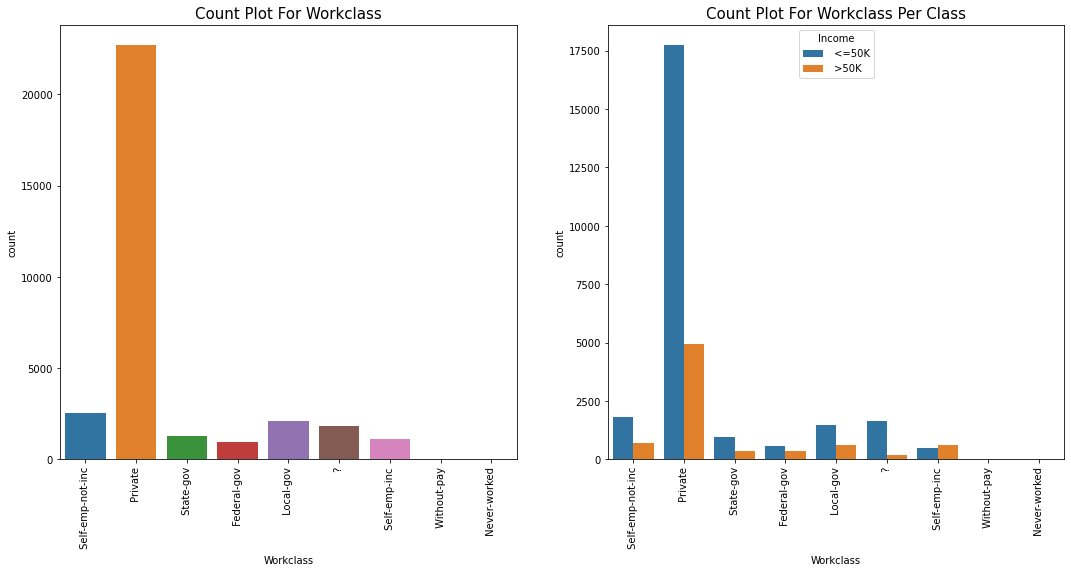

In [16]:
# Countplot for workclass column
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data['Workclass'])
plt.title("Count Plot For Workclass", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for workclass per class
plt.subplot(1,2,2)
sns.countplot(data=data, x='Workclass', hue='Income')
plt.title("Count Plot For Workclass Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In this dataset most number of people are working in private sector.

Taking look at the second plot above, I can see that who have an annual income is more than 50K or less than 50K are work in private.

# Education and Education Number

Text(0.5, 1.0, 'Count Plot for Education Per Class')

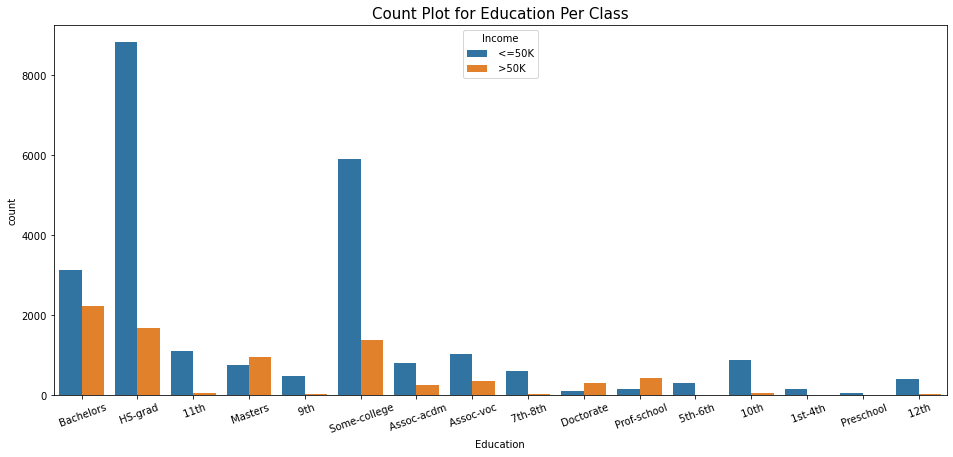

In [17]:
# Count Plot for Education Per Class
plt.figure(figsize=[16,15])
plt.subplot(2,1,1)
sns.countplot(x='Education', data=data, hue='Income')
plt.xticks(rotation=20)
plt.title("Count Plot for Education Per Class", fontsize = 15)

# Count Plot for Education Number Per Class
#plt.subplot(2,1,2)
#sns.countplot(x='education_num', data=data, hue='Income')
#plt.title("Count Plot for Education Number Per Class", fontsize = 15)
#plt.subplots_adjust(hspace = 0.35)

# Gender

Text(0.5, 1.0, 'Countplot for Gender Per Class')

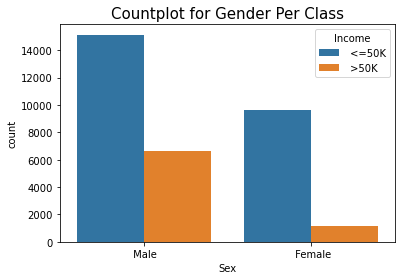

In [18]:
# Count Plot For Gender Per Class
sns.countplot(x='Sex' ,data=data, hue='Income')
plt.title("Countplot for Gender Per Class", fontsize = 15)

The number of male candidates are more than female.

When Comparing male and female, more percentage of male candidates are earn more than 50K.

# Maritial Status

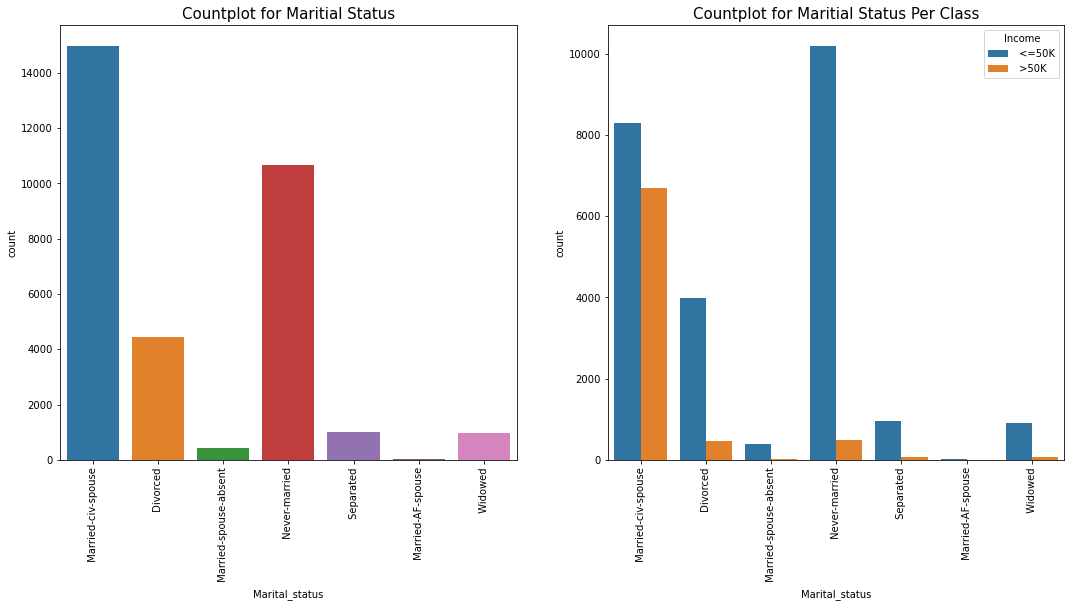


 --Value Counts-- 

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
     
     
Most of the people whose annual income is more than 50K, their marital status is married.


In [19]:
# Countplot for Maritial Status
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data['Marital_status'])
plt.title("Countplot for Maritial Status", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for Maritial Status Per Class
plt.subplot(1,2,2)
sns.countplot(data['Marital_status'],hue=data['Income'])
plt.title("Countplot for Maritial Status Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(data['Marital_status'].value_counts())
print('     ')
print('     ')
print('Most of the people whose annual income is more than 50K, their marital status is married.')

# Relationship

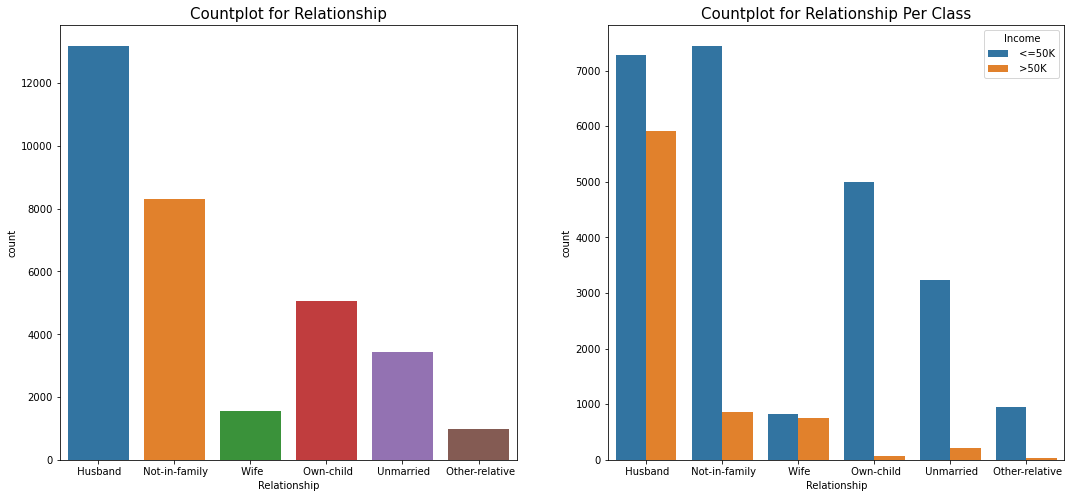


 --Value Counts-- 

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


In [20]:
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data['Relationship'])
plt.title('Countplot for Relationship', fontsize = 15)


plt.subplot(1,2,2)
sns.countplot(data['Relationship'],hue=data['Income'])
plt.title('Countplot for Relationship Per Class', fontsize = 15)
plt.show()

print('\n --Value Counts-- \n')
print(data['Relationship'].value_counts())

# Race

Text(0.5, 1.0, 'Countplot for Race Per Class')

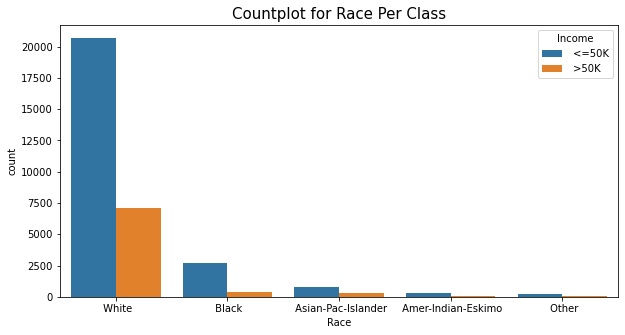

In [21]:
plt.figure(figsize=[10,5])
sns.countplot(data['Race'], hue=data['Income'])
plt.title('Countplot for Race Per Class', fontsize = 15)

In this dataset majority of information about white race is more while all other races are lesser.

# Country

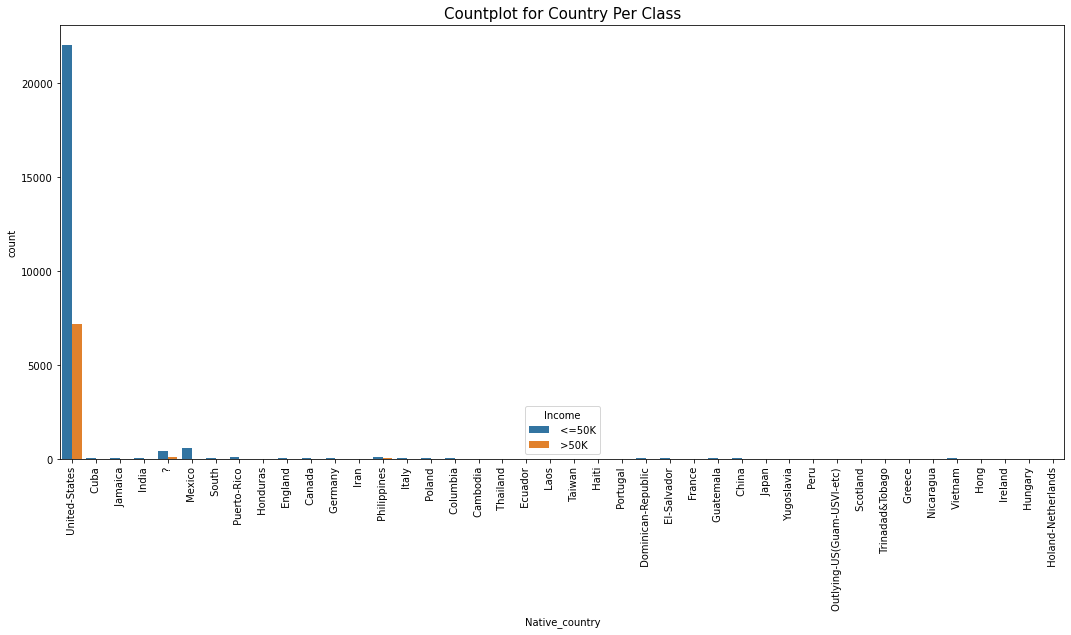


 --Value Counts-- 

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru            

In [22]:
plt.figure(figsize=[18,8])
sns.countplot(data['Native_country'],hue=data['Income'])
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(data['Native_country'].value_counts())

print('\n-----------------------------------')
print('{}% people belong from united states.'
      .format(round(len(data[data['Native_country']=='United-States'])/32561*100,2)))

print('{}% people belong from other country.'
      .format(round(len(data[data['Native_country']!='United-States'])/32561*100,2)))

From analysis above, 91.38% peoples are from United-states and only 8.62% people belong from other countries.

And There are 41 countries in this column, so it's better if we transform this feature with value as either United States or Other

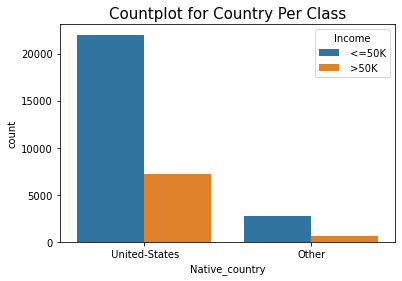

In [23]:
# Transforming native country column with value as either United States or Other.
countries = data['Native_country'].unique()[1:]
data['Native_country'] = data['Native_country'].replace(to_replace=countries, value='Other')

# Countplot for Country Per Class
sns.countplot(data['Native_country'], hue=data['Income'])
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.show()

# Occupation

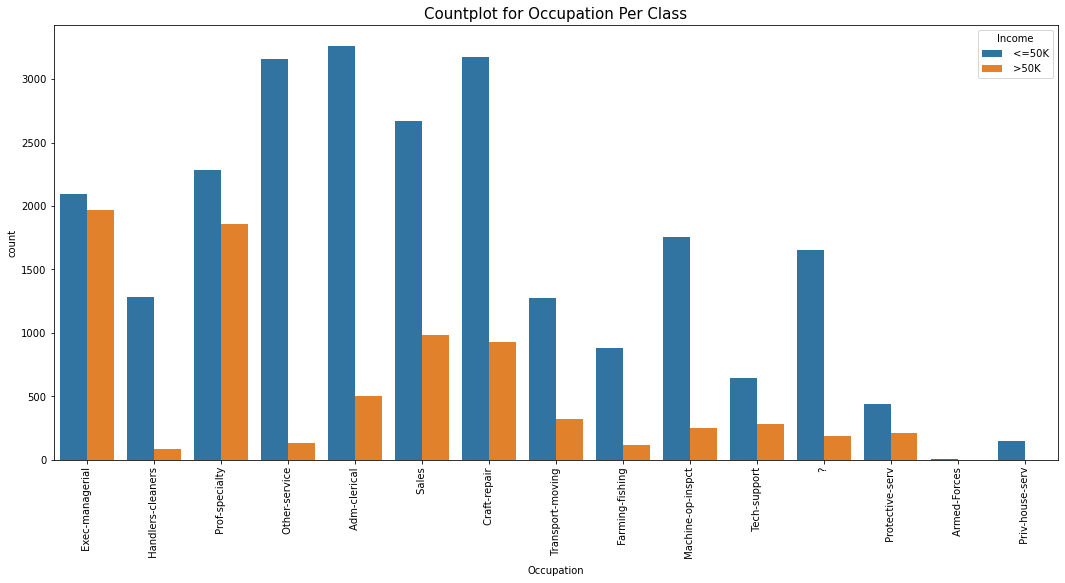

In [24]:
plt.figure(figsize=[18,8])
sns.countplot(data['Occupation'], hue=data['Income'])
plt.title('Countplot for Occupation Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In occupation column the values are well distributed in all categories

# Hours per week

Text(0.5, 1.0, 'Distribution plot for hours per week')

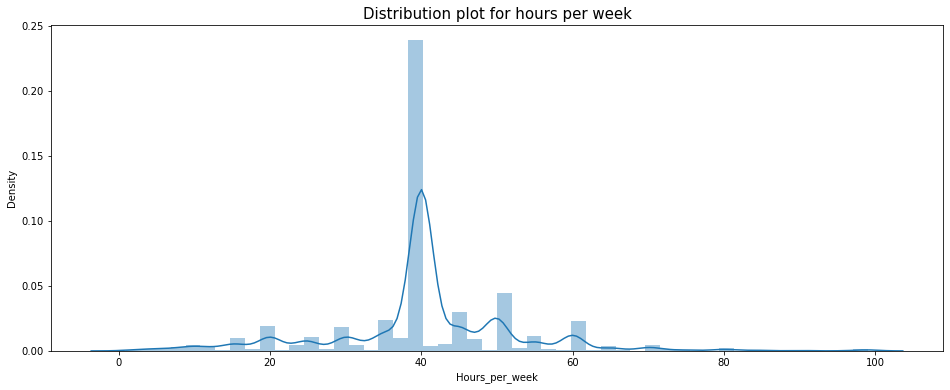

In [25]:
# Distribution plot for hours per week column
plt.figure(figsize=[16,6])
sns.distplot(data['Hours_per_week'])
plt.title('Distribution plot for hours per week', fontsize = 15)

By looking distribution plot for hours per weak column our data is aligned around the centre.

In this dataset most of the people work 30 to 40 hours per week

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

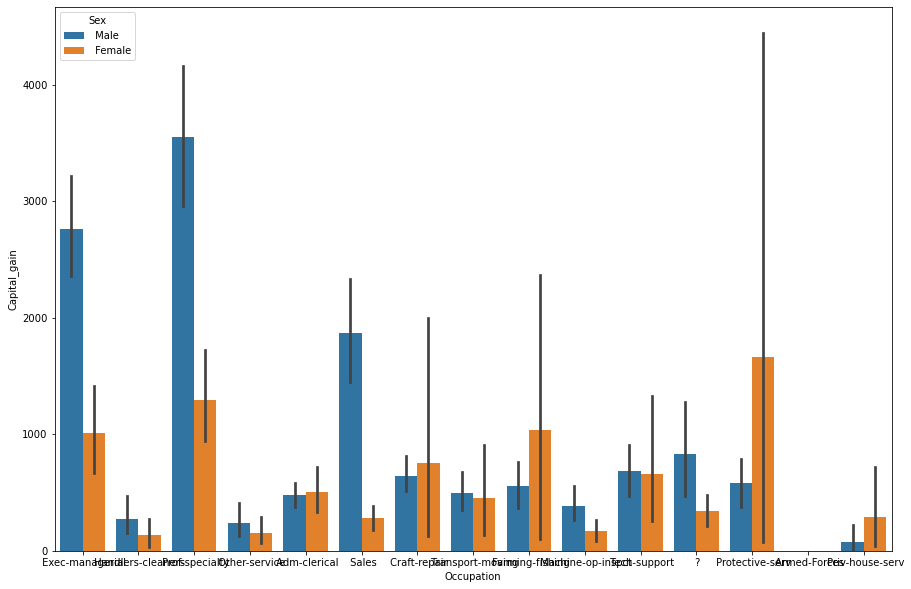

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_gain',data=data,hue='Sex')
plt.xticks(rotation=0)
##Checking the distribution of Capital_gain and  Occupation as per gender##

<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

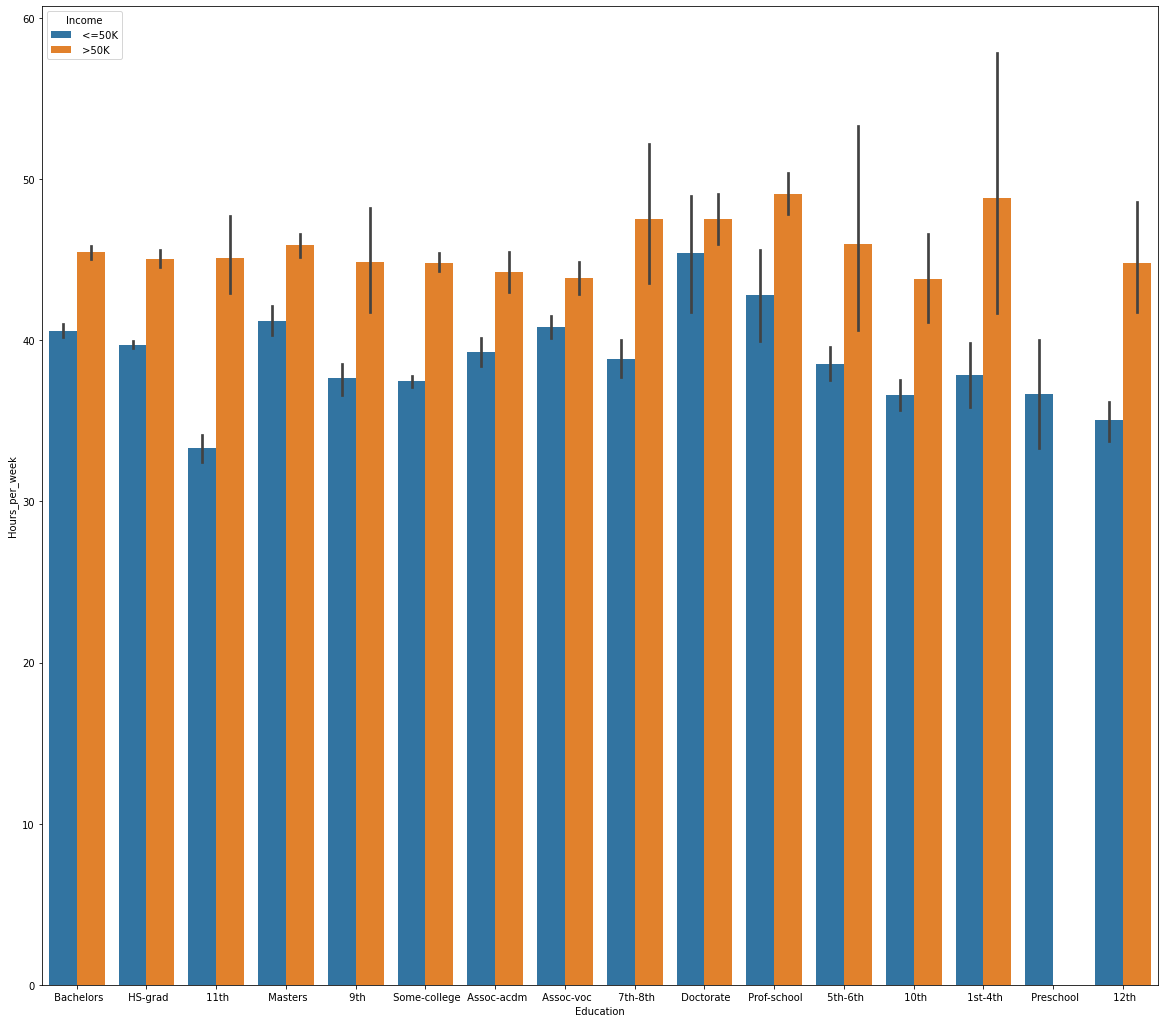

In [27]:
plt.figure(figsize=(20,18))
sns.barplot(x='Education',y='Hours_per_week',data=data,hue='Income')
##Checking the distribution of Education and  Hours_per_week as gender###

In [28]:
# Categorical features
cat_df = data.select_dtypes(include=['object'])
num_df = data.select_dtypes(include=['int64'])

# Categorical column with their unique value
for i in cat_df.columns:
    print("{} : {} \n".format(i, cat_df[i].unique()))

Workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Marital_status : [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Occupation : [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv'] 

Relationship : [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

Race : [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

Sex : [' Male' ' Female'] 

Native_country : [' United-States

In [29]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [30]:
from sklearn.preprocessing import LabelEncoder
temp_data = data.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['Income'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

Education_num     0.335182
Relationship      0.250924
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Marital_status    0.199295
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.034476
Fnlwgt            0.009481
dtype: float64


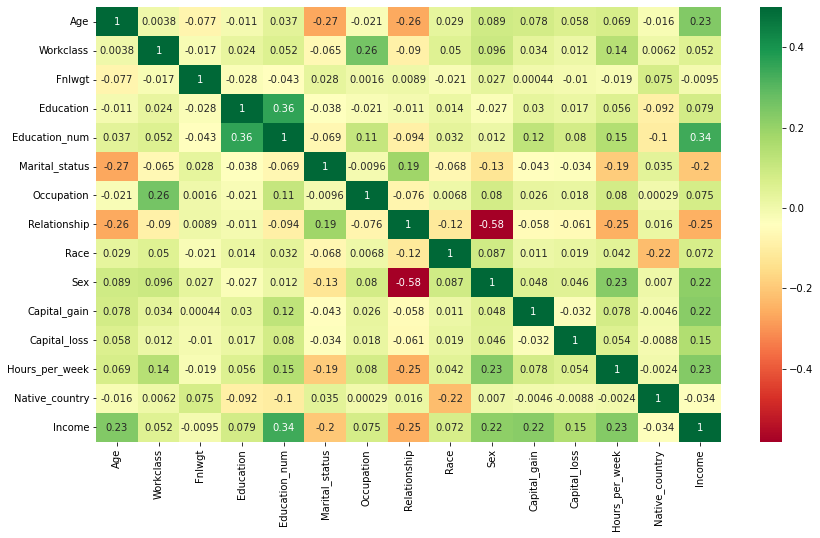

In [31]:
# Correlation Heatmap
plt.figure(figsize=[14,8])
sns.heatmap(temp_data.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

In [32]:
data['Workclass']=le.fit_transform(data['Workclass'])
data['Income']=le.fit_transform(data['Income']) 
data['Race']=le.fit_transform(data['Race'])
data['Relationship']=le.fit_transform(data['Relationship'])
data['Sex']=le.fit_transform(data['Sex'])
data['Occupation']=le.fit_transform(data['Occupation'])
data['Marital_status']=le.fit_transform(data['Marital_status'])
data['Native_country']=le.fit_transform(data['Native_country'])
data['Education']=le.fit_transform(data['Education'])
data['Fnlwgt']=le.fit_transform(data['Fnlwgt'])

In [33]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,2925,9,13,2,4,0,4,1,0,0,13,0,0
1,38,4,14085,11,9,0,6,1,4,1,0,0,40,0,0
2,53,4,15335,1,7,2,6,0,2,1,0,0,40,0,0
3,28,4,19354,9,13,2,10,5,2,0,0,0,40,1,0
4,37,4,17699,12,14,2,4,5,4,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,16527,7,12,2,13,5,4,0,0,0,38,0,0
32556,40,4,8079,11,9,2,7,0,4,1,0,0,40,0,1
32557,58,4,7882,11,9,6,1,4,4,0,0,0,40,0,0
32558,22,4,12880,11,9,4,1,3,4,1,0,0,20,0,0


In [34]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

# Feature Selection

In [35]:
prediction_column = data['Income']
data.drop('Income', axis = 1, inplace = True)
feature_columns = data

In [36]:
X = feature_columns.values
y = prediction_column.values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6512, 14), (26048,), (6512,))

# Simple Logistic Regression

In [39]:
logictic_model = LogisticRegression(max_iter = 200)
logictic_model.fit(X_train, y_train)

print("Training Accuracy : {}%".format(logictic_model.score(X_train, y_train) * 100))
print("Testing Accuracy  : {}%".format(logictic_model.score(X_test, y_test) * 100))

Training Accuracy : 80.63191031941031%
Testing Accuracy  : 79.99078624078624%


Thus our Logistic Regression model is having 80% Training Accuracy and 79% Testing Accuracy

In [45]:
train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(X_train, y_train)
    
    train_score = logictic_model.score(X_train, y_train) * 100
    test_score = logictic_model.score(X_test, y_test) * 100
    
    logistic_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

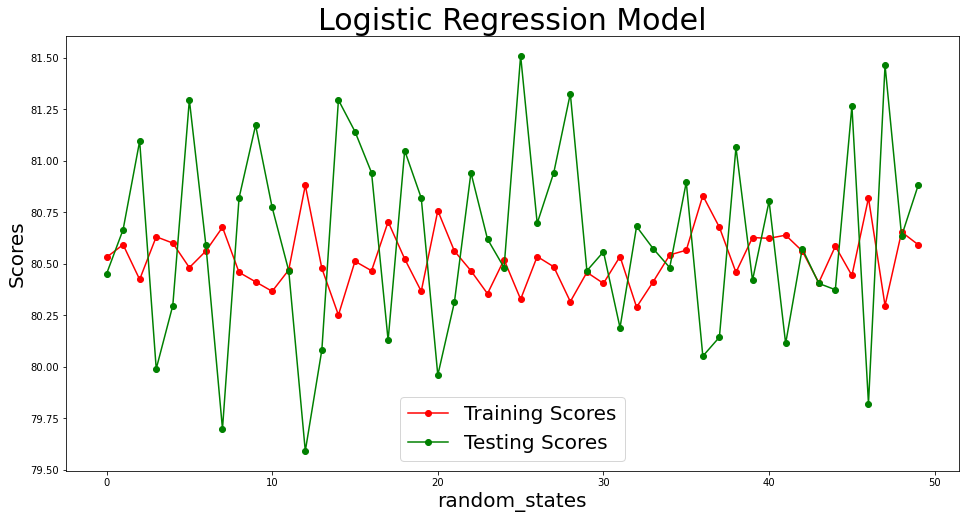

In [46]:
plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
plt.savefig('logistic_model_performance.png')
plt.show()

In [47]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(train_scores, test_scores, abs(np.array(train_scores) - np.array(test_scores))):
    print(scores)

(80.5320945945946, 80.4514742014742, 0.08062039312039815)
(80.59351965601965, 80.66646191646191, 0.07294226044226093)
(80.42460073710073, 81.09643734643734, 0.6718366093366086)
(80.63191031941031, 79.99078624078624, 0.641124078624074)
(80.60119778869779, 80.29791154791155, 0.30328624078623534)
(80.48218673218673, 81.2960687960688, 0.8138820638820619)
(80.56280712530712, 80.5896805896806, 0.02687346437348026)
(80.67797911547912, 79.69901719901719, 0.9789619164619268)
(80.45915233415234, 80.82002457002457, 0.36087223587223605)
(80.41308353808354, 81.17321867321867, 0.7601351351351298)
(80.36701474201475, 80.77395577395578, 0.40694103194103093)
(80.47066953316954, 80.46683046683046, 0.0038390663390828195)
(80.88144963144963, 79.59152334152334, 1.289926289926285)
(80.47834766584766, 80.08292383292384, 0.3954238329238251)
(80.25184275184274, 81.2960687960688, 1.0442260442260505)
(80.51289926289927, 81.14250614250615, 0.6296068796068823)
(80.46683046683046, 80.94287469287468, 0.4760442260442

Logistic Regression with Standard Scaling and PCA                 

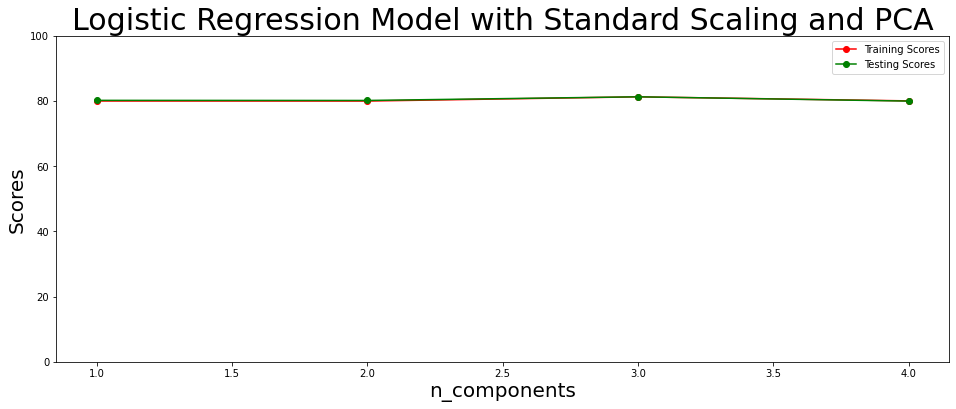

In [48]:
training_scores = []
testing_scores = []
n_components = list(range(1, 5))
for n_component in n_components:
#     # Converting Train Data to Same Scale
#     standard_scaler = StandardScaler()
#     # Scaling training samples
#     scaled_X_train = standard_scaler.fit_transform(X_train)
#     # Scaling testing samples
#     scaled_X_test = standard_scaler.transform(X_test)
    
    # PCA Implementation
    pca = PCA(n_components = n_component)
    pca_X_train = pca.fit_transform(X_train)
    pca_X_test = pca.transform(X_test)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(pca_X_train, y_train)
    training_scores.append(logictic_model.score(pca_X_train, y_train) * 100)
    testing_scores.append(logictic_model.score(pca_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(n_components, training_scores, 'ro-')
plt.plot(n_components, testing_scores, 'go-')
plt.xlabel('n_components', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model with Standard Scaling and PCA', fontsize = 30)
plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

# Decision Tree Classifier

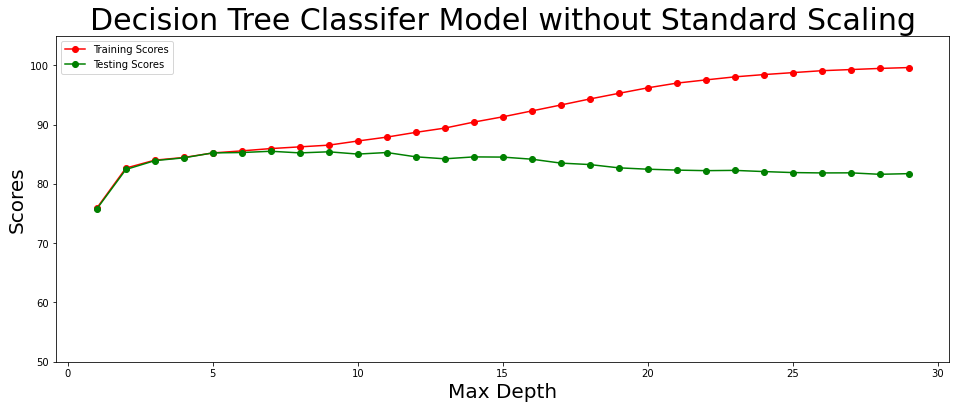

In [40]:
from sklearn.tree import DecisionTreeClassifier

training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    decision_tree_classifier = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree_classifier.fit(X_train, y_train)
    training_scores.append(decision_tree_classifier.score(X_train, y_train) * 100)
    testing_scores.append(decision_tree_classifier.score(X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depth', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifer Model without Standard Scaling', fontsize = 30)
plt.ylim(50, 105)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.savefig('decision_tree_model_performance.png')
plt.show()

In [41]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(training_scores, testing_scores):
    print(scores)

(75.94824938574939, 75.7985257985258)
(82.67045454545455, 82.43243243243244)
(84.00644963144963, 83.92199017199017)
(84.45178132678133, 84.3980343980344)
(85.2195945945946, 85.22727272727273)
(85.56894963144963, 85.28869778869779)
(85.95669533169533, 85.5036855036855)
(86.24462530712532, 85.22727272727273)
(86.53255528255528, 85.41154791154791)
(87.23126535626535, 85.02764127764128)
(87.8877457002457, 85.28869778869779)
(88.69011056511057, 84.56695331695332)
(89.40801597051598, 84.22911547911548)
(90.41769041769042, 84.55159705159704)
(91.3083538083538, 84.52088452088452)
(92.29883292383292, 84.16769041769042)
(93.29699017199017, 83.507371007371)
(94.31434275184274, 83.26167076167076)
(95.2664312039312, 82.7088452088452)
(96.19548525798525, 82.47850122850123)
(96.99017199017199, 82.32493857493857)
(97.53148034398035, 82.23280098280098)
(98.04591523341524, 82.27886977886978)
(98.42982186732186, 82.07923832923832)
(98.75998157248156, 81.9103194103194)
(99.08630221130221, 81.8488943488943

For max_depth = 7 , we get a Training Accuracy of 85.95% and a Testing Accuracy of 85.5036%

Decision Tree Classifier with Standard Scaling and PCA

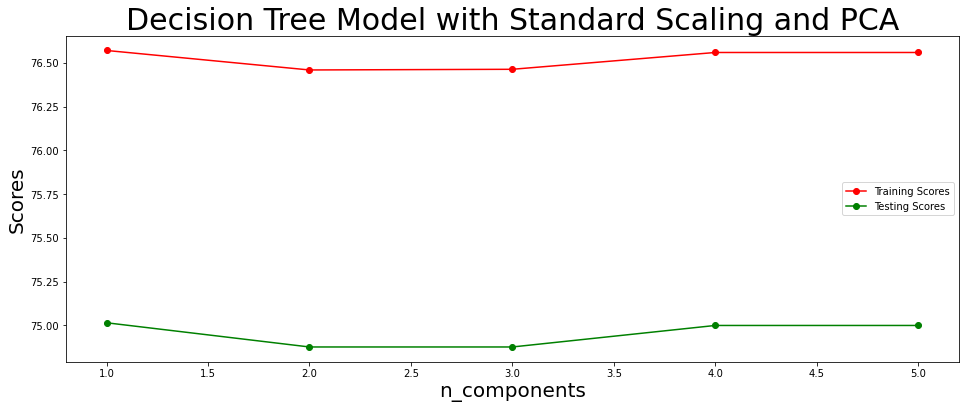

Max_Depth :  1
(76.57017813267814, 75.01535626535627)
(76.4588452088452, 74.87714987714988)
(76.46268427518427, 74.87714987714988)
(76.55866093366093, 75.0)
(76.55866093366093, 75.0)


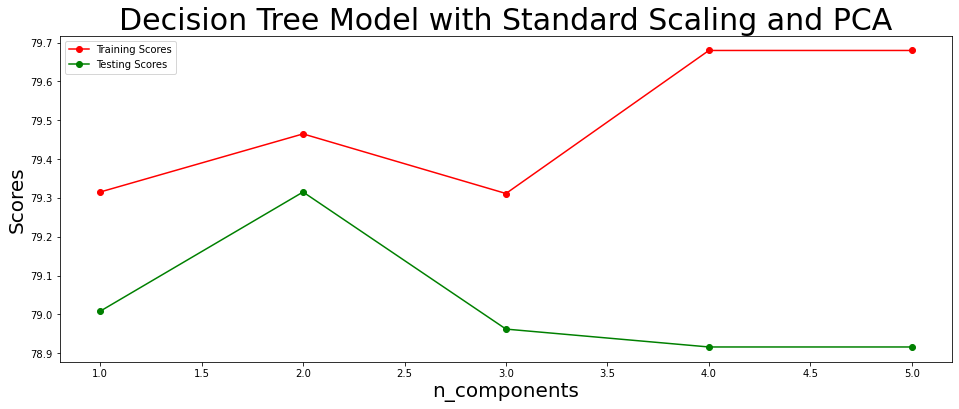

Max_Depth :  2
(79.31511056511057, 79.00798525798525)
(79.46483415233415, 79.31511056511057)
(79.31127149877149, 78.96191646191646)
(79.67982186732186, 78.91584766584766)
(79.67982186732186, 78.91584766584766)


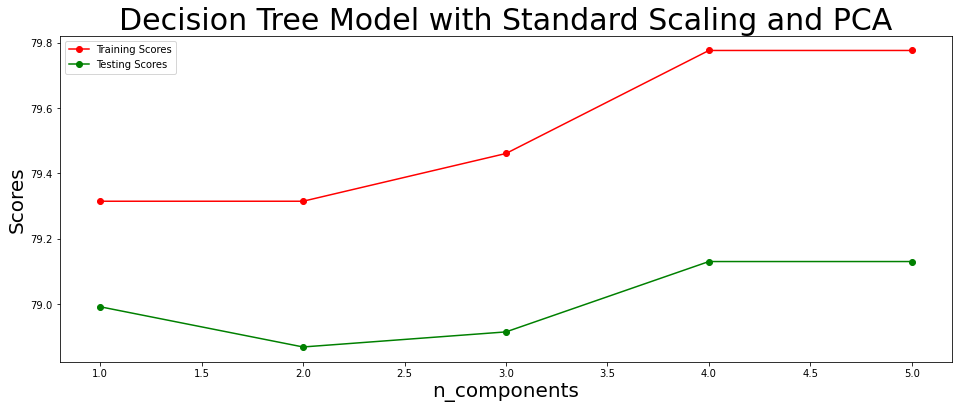

Max_Depth :  3
(79.31511056511057, 78.992628992629)
(79.31511056511057, 78.86977886977887)
(79.4609950859951, 78.91584766584766)
(79.77579852579852, 79.13083538083538)
(79.77579852579852, 79.13083538083538)


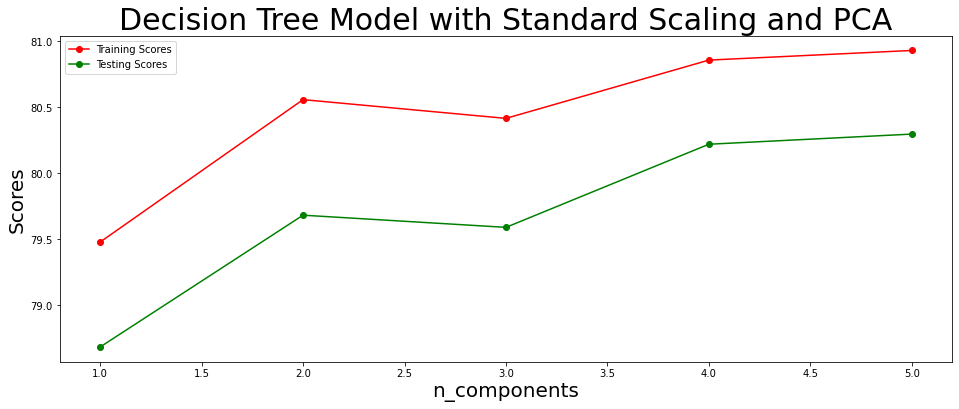

Max_Depth :  4
(79.48019041769042, 78.68550368550369)
(80.55896805896806, 79.68366093366093)
(80.41692260442261, 79.59152334152334)
(80.85841523341524, 80.22113022113022)
(80.93135749385749, 80.29791154791155)


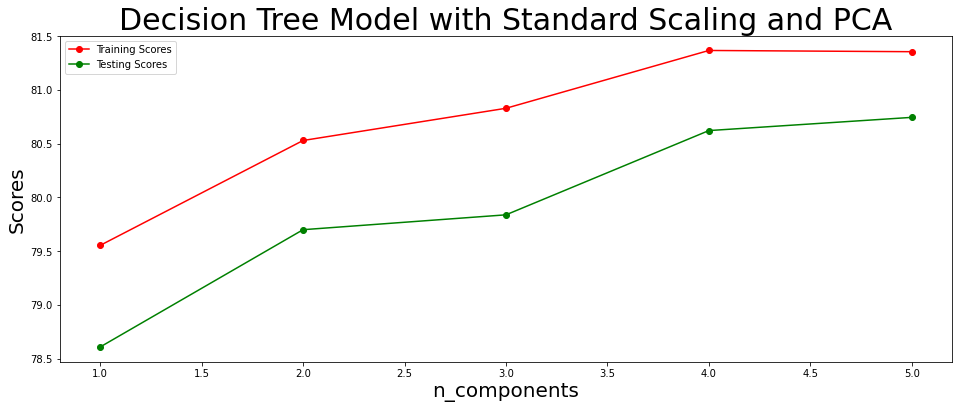

Max_Depth :  5
(79.55313267813267, 78.60872235872236)
(80.52825552825553, 79.69901719901719)
(80.8277027027027, 79.83722358722358)
(81.36517199017199, 80.62039312039312)
(81.3536547911548, 80.74324324324324)


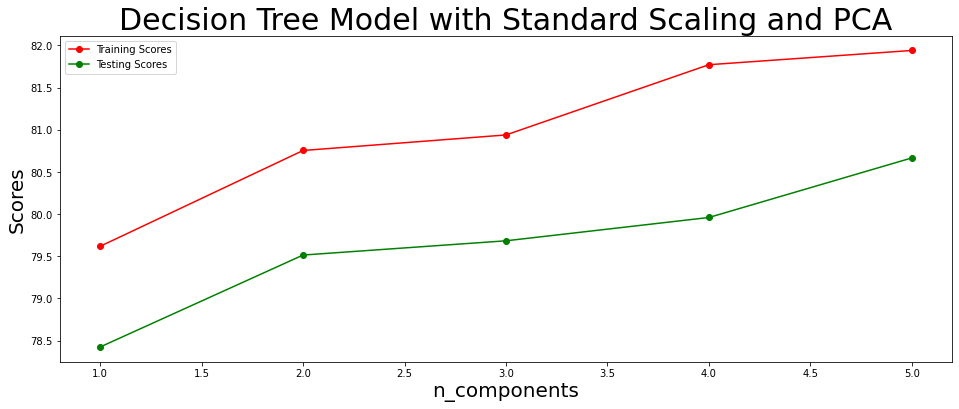

Max_Depth :  6
(79.61839680589681, 78.42444717444718)
(80.75476044226045, 79.51474201474201)
(80.93903562653563, 79.68366093366093)
(81.77211302211302, 79.96007371007371)
(81.94103194103194, 80.66646191646191)


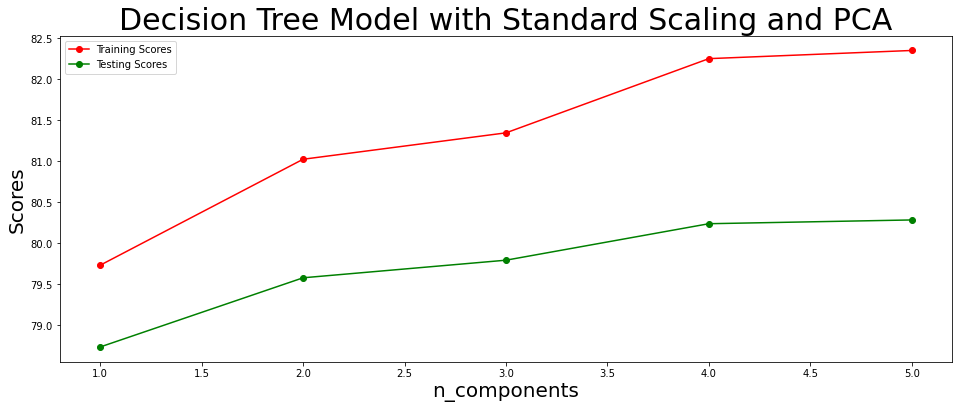

Max_Depth :  7
(79.72972972972973, 78.73157248157248)
(81.0234950859951, 79.57616707616708)
(81.34597665847666, 79.7911547911548)
(82.25199631449631, 80.23648648648648)
(82.35181203931205, 80.28255528255528)


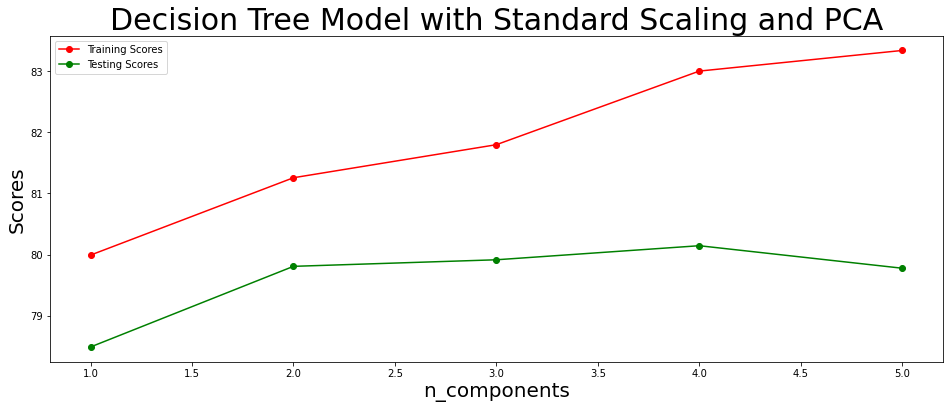

Max_Depth :  8
(79.99078624078624, 78.48587223587224)
(81.25767813267814, 79.80651105651106)
(81.79898648648648, 79.9140049140049)
(83.00445331695332, 80.1443488943489)
(83.34229115479116, 79.77579852579852)


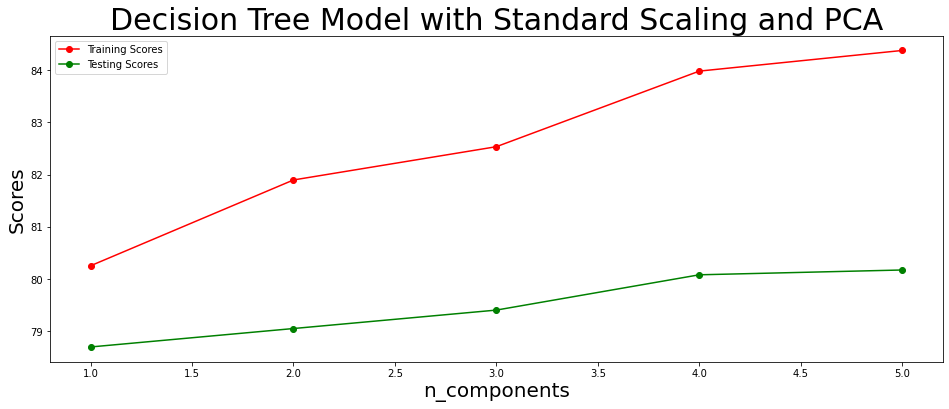

Max_Depth :  9
(80.25568181818183, 78.70085995085995)
(81.89880221130221, 79.05405405405406)
(82.53608722358723, 79.40724815724816)
(83.98341523341524, 80.08292383292384)
(84.37883906633907, 80.17506142506143)


In [44]:
for max_depth in range(1,10):
    training_scores = []
    testing_scores = []
    n_components = list(range(1, 6))
    for n_component in n_components:
        # Converting Train Data to Same Scale
        standard_scaler = StandardScaler()
        # Scaling training samples
        scaled_X_train = standard_scaler.fit_transform(X_train)
        # Scaling testing samples
        scaled_X_test = standard_scaler.transform(X_test)

        # PCA Implementation
        pca = PCA(n_components = n_component)
        pca_X_train = pca.fit_transform(scaled_X_train)
        pca_X_test = pca.transform(scaled_X_test)

        decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
        decision_tree_model.fit(pca_X_train, y_train)
        training_scores.append(decision_tree_model.score(pca_X_train, y_train) * 100)
        testing_scores.append(decision_tree_model.score(pca_X_test, y_test) * 100)

    plt.figure(figsize = (16, 6))
    plt.plot(n_components, training_scores, 'ro-')
    plt.plot(n_components, testing_scores, 'go-')
    plt.xlabel('n_components', fontsize = 20)
    plt.ylabel('Scores', fontsize = 20)
    plt.title('Decision Tree Model with Standard Scaling and PCA', fontsize = 30)
    # plt.ylim(60, 90)
    plt.legend(labels = ['Training Scores', 'Testing Scores'])
    plt.show()
    
    # Let's print the corresponding Training and Testing Scores
    print("Max_Depth : ", max_depth)
    for scores in zip(training_scores, testing_scores):
        print(scores)

With PCA, Statndard Scaling and Decision Tree Classifier, we can get a Training accuracy of 81.35% and a Testing accuracy of 80.74%